In [17]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras import losses

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

['pulsar_stars.csv']


In [18]:
# Loading the dataset
dataset = pd.read_csv('pulsar_stars.csv')

1. Once the dataset is loaded, let's see some relevant information about the dataset such as column's titles and types, number of records and shape.

In [19]:
# EDA
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
None


2. Now, let's divide our dataset into two subsets: data and target.

In [20]:
# Droping the target column
data = dataset.drop(['target_class'], axis=1)

# Normalizing the data for all data points to fit in the range [0,1]
data = data / np.max(data)

target = dataset[['target_class']]

In [21]:
# Construct the training and testing splits 
trainX, testX, trainY, testY = train_test_split(data, target, test_size=0.25)

Machine Learning algorithms works better when integer labels are transformed into vector labels. In order to accomplish this transformation I will instantiate a LabelBinarizer object and apply the transformation methods into our trainY and testY sets.

In [22]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

With keras, it is possible to define models to our neural network (nn). In this case, we are going to work with a Sequential nn, which is just the nn as we already know, i.e., each layer has as its input the output of the former layer. It is worth mention that our neural network is 8-4-2-1.

In [24]:
# Defining the model
model = Sequential()
model.add(Dense(4, input_shape=(8,), activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

We are going to use the Stochastic Gradient Descent technique as an optimizer, initially with a learning rate = 0.1. Furthermore, as this is a binary classification problem, in this case a common loss function to use is the binary cross-entropy.

In [25]:
# Stochastic Gradient descent optimizer with learning rate = 0.1
sgd = SGD(0.1)

model.compile(loss='binary_crossentropy', optimizer=sgd,
    metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=128, epochs=200)

Train on 13423 samples, validate on 4475 samples
Epoch 1/200
13423/13423 [==============================] - 1s 38us/step - loss: 0.3578 - acc: 0.9090 - val_loss: 0.3127 - val_acc: 0.9068
Epoch 2/200
13423/13423 [==============================] - 0s 18us/step - loss: 0.3061 - acc: 0.9090 - val_loss: 0.3100 - val_acc: 0.9068
Epoch 3/200
13423/13423 [==============================] - 0s 12us/step - loss: 0.3050 - acc: 0.9090 - val_loss: 0.3095 - val_acc: 0.9068
Epoch 4/200
13423/13423 [==============================] - 0s 12us/step - loss: 0.3045 - acc: 0.9090 - val_loss: 0.3090 - val_acc: 0.9068
Epoch 5/200
13423/13423 [==============================] - 0s 12us/step - loss: 0.3040 - acc: 0.9090 - val_loss: 0.3085 - val_acc: 0.9068
Epoch 6/200
13423/13423 [==============================] - 0s 12us/step - loss: 0.3035 - acc: 0.9090 - val_loss: 0.3080 - val_acc: 0.9068
Epoch 7/200
13423/13423 [==============================] - 0s 12us/step - loss: 0.3030 - acc: 0.9090 - val_loss: 0.3075 - v

Epoch 118/200
13423/13423 [==============================] - 0s 10us/step - loss: 0.0827 - acc: 0.9762 - val_loss: 0.0779 - val_acc: 0.9781
Epoch 119/200
13423/13423 [==============================] - 0s 10us/step - loss: 0.0826 - acc: 0.9764 - val_loss: 0.0778 - val_acc: 0.9781
Epoch 120/200
13423/13423 [==============================] - 0s 10us/step - loss: 0.0826 - acc: 0.9761 - val_loss: 0.0777 - val_acc: 0.9781
Epoch 121/200
13423/13423 [==============================] - 0s 10us/step - loss: 0.0825 - acc: 0.9762 - val_loss: 0.0777 - val_acc: 0.9781
Epoch 122/200
13423/13423 [==============================] - 0s 10us/step - loss: 0.0825 - acc: 0.9765 - val_loss: 0.0776 - val_acc: 0.9781
Epoch 123/200
13423/13423 [==============================] - 0s 10us/step - loss: 0.0824 - acc: 0.9766 - val_loss: 0.0775 - val_acc: 0.9781
Epoch 124/200
13423/13423 [==============================] - 0s 10us/step - loss: 0.0824 - acc: 0.9764 - val_loss: 0.0775 - val_acc: 0.9781
Epoch 125/200
13423/

In [28]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=['Prediction']))

              precision    recall  f1-score   support

  Prediction       1.00      1.00      1.00      4475

   micro avg       1.00      1.00      1.00      4475
   macro avg       1.00      1.00      1.00      4475
weighted avg       1.00      1.00      1.00      4475



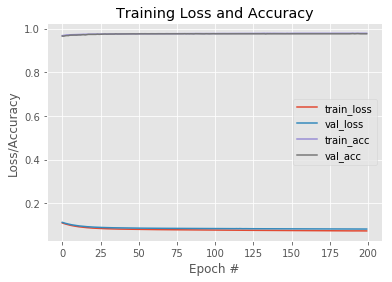

In [17]:
# Plotting the curve Epoch vs. Loss/Accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 200), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 200), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 200), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 200), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')